In [2]:
import os,sys,math,cmath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from collections import Counter

b1 = np.array([0.860474569594575,0.0365159146990011,0.358997239874682])  #先暂时手动输入，后面可以改为自动读取
b2 = np.array([0,1.07080545537165,0.0417868785140344])
b3 = np.array([0,0,1.75386677814264])

vectors = [b1,b2,b3,-b1,-b2,-b3,b1+b2,b1+b3,b2+b3,b1-b2,b1-b3,b2-b3,b2-b1,b3-b1,b3-b2,-b1-b2,-b1-b3,-b2-b3,b1+b2+b3,b1+b2-b3,b1-b2+b3,-b1+b2+b3,b1-b2-b3,-b1+b2-b3,-b1-b2+b3,-b1-b2-b3]


In [3]:


result={}

for i in range(len(vectors)):
    result[i]={}
    for j in range(i+1,len(vectors)):
        cross=np.cross(vectors[i],vectors[j])
        if np.linalg.norm(cross) != 0:
            n3=0
            for k in range(len(vectors)):
                rank=np.vstack((vectors[i],vectors[j],vectors[k])).T
                if np.linalg.matrix_rank(rank) == 3:
                    left=np.array([vectors[i],vectors[j],vectors[k]])
                    right=np.array([0.5*np.dot(vectors[i],vectors[i]),0.5*np.dot(vectors[j],vectors[j]),0.5*np.dot(vectors[k],vectors[k])])
                    X=np.linalg.solve(left,right)
                    result[i][j] = result[i].get(j, {})
                    result[i][j][n3]=X
                    n3=n3+1
                       

print(result[0][1])


{0: array([0.11873322, 0.50199681, 0.87693339]), 1: array([ 0.84755673,  0.57043933, -0.87693339]), 2: array([-0.03044893,  0.48798738,  1.23593063]), 3: array([0.10136859, 0.50036613, 0.91872027]), 4: array([ 0.69837457,  0.5564299 , -0.51793615]), 5: array([ 0.83019209,  0.56880864, -0.83514651]), 6: array([0.06163294, 0.49663463, 1.01434154]), 7: array([-0.13599126,  0.47807609,  1.48991145]), 8: array([ 1.20302132,  0.60382037, -1.73233602]), 9: array([ 1.13701049,  0.59762141, -1.5734852 ]), 10: array([-0.06063242,  0.4851529 ,  1.30856524]), 11: array([ 0.69382878,  0.55600301, -0.506997  ]), 12: array([-0.27235457,  0.46527045,  1.81806095]), 13: array([0.05708715, 0.49620774, 1.02528068]), 14: array([ 0.97500948,  0.58240819, -1.18364023]), 15: array([ 1.17283783,  0.60098589, -1.6597014 ]), 16: array([-0.20591039,  0.47151011,  1.65816732]), 17: array([ 1.50529393,  0.63220625, -2.45973556])}


In [4]:
#def sort_result_by_x(d):
#    return sorted(d.items(), key=lambda x: x[1][0])

result={}
result_center={}
X={}
#X=[[0]*3 for i in range(len(vectors))]
for i in range(len(vectors)):
    result[i]={}
    result_center[i]={}
    for j in range(i+1,len(vectors)):
        cross=np.cross(vectors[i],vectors[j])
        if np.linalg.norm(cross) != 0:
            n3=0
            for k in range(len(vectors)):
                rank=np.vstack((vectors[i],vectors[j],vectors[k])).T
                if np.linalg.matrix_rank(rank) == 3:
                    left=np.array([vectors[i],vectors[j],vectors[k]])
                    right=np.array([0.5*np.dot(vectors[i],vectors[i]),0.5*np.dot(vectors[j],vectors[j]),0.5*np.dot(vectors[k],vectors[k])])
                    solve=np.linalg.solve(left,right)
                    X[n3]=np.linalg.solve(left,right)
                    n3=n3+1
            #list_x=X.values()
            #sort=sort_result_by_x(X)
            x_values=[val for val in X.values()]
            sort=sorted(x_values, key=lambda v:v[0])
            midpoint=len(sort)//2-1
            result[i][j]=sort
            result_center[i][j]=sort[midpoint:midpoint+2]
            if i==0 and j==1:
                print(solve) 
                    
                       
print(result[0][1][0])
print(result[0][1])
print(result_center[0][1])

#result 储存了所有的坐标值  result_center 取中心两点


[ 1.50529393  0.63220625 -2.45973556]
[-0.27235457  0.46527045  1.81806095]
[array([-0.27235457,  0.46527045,  1.81806095]), array([-0.20591039,  0.47151011,  1.65816732]), array([-0.13599126,  0.47807609,  1.48991145]), array([-0.06063242,  0.4851529 ,  1.30856524]), array([-0.03044893,  0.48798738,  1.23593063]), array([0.05708715, 0.49620774, 1.02528068]), array([0.06163294, 0.49663463, 1.01434154]), array([0.10136859, 0.50036613, 0.91872027]), array([0.11873322, 0.50199681, 0.87693339]), array([ 0.69382878,  0.55600301, -0.506997  ]), array([ 0.69837457,  0.5564299 , -0.51793615]), array([ 0.83019209,  0.56880864, -0.83514651]), array([ 0.84755673,  0.57043933, -0.87693339]), array([ 0.97500948,  0.58240819, -1.18364023]), array([ 1.13701049,  0.59762141, -1.5734852 ]), array([ 1.17283783,  0.60098589, -1.6597014 ]), array([ 1.20302132,  0.60382037, -1.73233602]), array([ 1.50529393,  0.63220625, -2.45973556])]
[array([0.11873322, 0.50199681, 0.87693339]), array([ 0.69382878,  0.55

In [5]:
print(result_center[0][1][0][1])

0.5019968114135409


In [11]:
from collections import Counter

point_list = [[[tuple([0]*3) for _ in range(2)] for j in range(len(vectors))] for i in range(len(vectors))]

for i in range(len(vectors)):
    for j in range(i+1, len(vectors)):
        cross = np.cross(vectors[i], vectors[j])
        if np.linalg.norm(cross) != 0:
            point_list[i][j] = np.around(tuple(result_center[i][j]),3)

coordinate_counts = Counter(tuple(point) for sublist in point_list for sublist2 in sublist for point in sublist2)

print(coordinate_counts)


Counter({(0, 0, 0): 728, (-0.149, -1.785, -0.153): 5, (0.119, 0.502, 0.877): 3, (0.694, 0.556, -0.507): 3, (0.161, -0.502, 0.877): 3, (-0.161, 0.502, 0.877): 3, (-0.119, 0.569, -0.835): 3, (0.161, 0.569, -0.835): 3, (-0.694, 0.515, 0.549): 3, (-0.694, -0.556, 0.507): 3, (-0.119, -0.502, -0.877): 3, (-0.161, 0.502, -0.877): 3, (-0.167, 0.519, -0.866): 3, (-0.742, 0.465, 0.518): 3, (0.161, -0.502, -0.877): 3, (0.119, -0.569, 0.835): 3, (0.694, -0.515, -0.549): 3, (-0.161, -0.569, 0.835): 3, (0.119, 0.502, -0.877): 3, (-0.921, -0.622, -0.846): 3, (0.117, 0.553, 0.877): 2, (0.679, 0.605, -0.476): 2, (0.101, 0.5, 0.919): 2, (0.112, 0.552, 0.888): 2, (0.167, -0.519, 0.866): 2, (0.742, -0.465, -0.518): 2, (0.699, 0.539, -0.518): 2, (0.759, -0.464, -0.56): 2, (0.182, 0.502, 0.877): 2, (0.744, 0.555, -0.476): 2, (-0.094, 0.5, 0.919): 2, (0.3, 0.491, 1.161): 2, (0.896, 0.5, 0.919): 2, (-0.184, 0.502, 0.877): 2, (-0.748, 0.57, -0.877): 2, (-0.241, 0.578, -1.083): 2, (-0.101, 0.57, 0.877): 2, (0.0

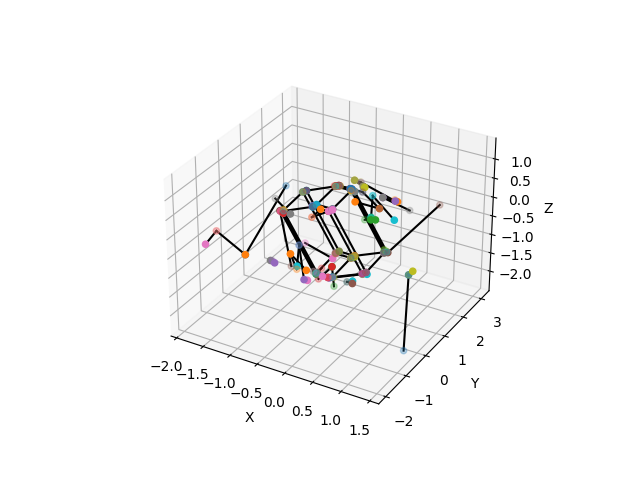

In [13]:
from mpl_toolkits.mplot3d import Axes3D


%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(len(vectors)):
    for j in range(i+1,len(vectors)):
        cross=np.cross(vectors[i],vectors[j])
        if np.linalg.norm(cross) != 0:
            x=[np.around(result_center[i][j][0][0],3),np.around(result_center[i][j][1][0],3)]
            y=[np.around(result_center[i][j][0][1],3),np.around(result_center[i][j][1][1],3)]
            z=[np.around(result_center[i][j][0][2],3),np.around(result_center[i][j][1][2],3)]
            if coordinate_counts.get((np.around(result_center[i][j][0][0],3),np.around(result_center[i][j][0][1],3),np.around(result_center[i][j][0][2],3)),0)>=2 :
                ax.scatter(x,y,z)
                ax.plot([result_center[i][j][0][0],result_center[i][j][1][0]],[result_center[i][j][0][1],result_center[i][j][1][1]],[result_center[i][j][0][2],result_center[i][j][1][2]],color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()